**ELAOUFI IMANE**

# Atelier 3

# PART1 : **Language Modeling / Regression**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from gensim.models import Word2Vec
from sklearn.naive_bayes import GaussianNB

In [113]:
# Load the dataset
data = pd.read_csv(r'C:\Users\IMANE\Downloads\answers.csv')
print(data.head())

    id                                             answer  score  correct
0  1.1  High risk problems are address in the prototyp...    3.5      0.0
1  1.1  To simulate portions of the desired final prod...    5.0      1.0
2  1.1  A prototype program simulates the behaviors of...    4.0      1.0
3  1.1  Defined in the Specification phase a prototype...    5.0      1.0
4  1.1  It is used to let the users have a first idea ...    3.0      0.0


**Preprocessing NLP Pipeline:**

In [114]:

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

data['processed_answer'] = data['answer'].apply(preprocess_text)

**Encoding Data Vectors:**

*Word2Vec:*

In [115]:
sentences = [word_tokenize(answer.lower()) for answer in data['answer']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


*Bag of Words (BoW):*

In [116]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['processed_answer'])

*TF-IDF:*

In [117]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['processed_answer'])


**Training Models:**

*Support Vector Regression (SVR):*

In [118]:
# Create document vectors by averaging word vectors
def get_document_vector(doc):
    vectors = [word2vec_model.wv[word] for word in doc if word in word2vec_model.wv]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

data['doc_vector'] = data['processed_answer'].apply(get_document_vector)

In [119]:
# Prepare data for regression models
X = np.array(data['doc_vector'].tolist())
y = data['score']  # Replace 'score' with the actual column name if different

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [120]:
# Train the SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict and evaluate the SVR model
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Model: SVR")
print(f"Mean Squared Error: {mse_svr}")
print(f"Root Mean Squared Error: {rmse_svr}")
print(f"R-squared: {r2_svr}")

Model: SVR
Mean Squared Error: 1.5882719182310074
Root Mean Squared Error: 1.2602666060127943
R-squared: -0.2417634798465298


*Linear Regression:*

In [121]:
# Train and evaluate Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Model: LinearRegression")
print(f"Mean Squared Error: {mse_lr}")
print(f"Root Mean Squared Error: {rmse_lr}")
print(f"R-squared: {r2_lr}")

Model: LinearRegression
Mean Squared Error: 1.3266568634594469
Root Mean Squared Error: 1.1518059139713803
R-squared: -0.037224183354275686


*Decision Tree:*

In [122]:
# Train and evaluate Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Model: Decision Tree")
print(f"Mean Squared Error: {mse_dt}")
print(f"Root Mean Squared Error: {rmse_dt}")
print(f"R-squared: {r2_dt}")

Model: Decision Tree
Mean Squared Error: 1.8926140947081704
Root Mean Squared Error: 1.3757231170217976
R-squared: -0.4797082522676599


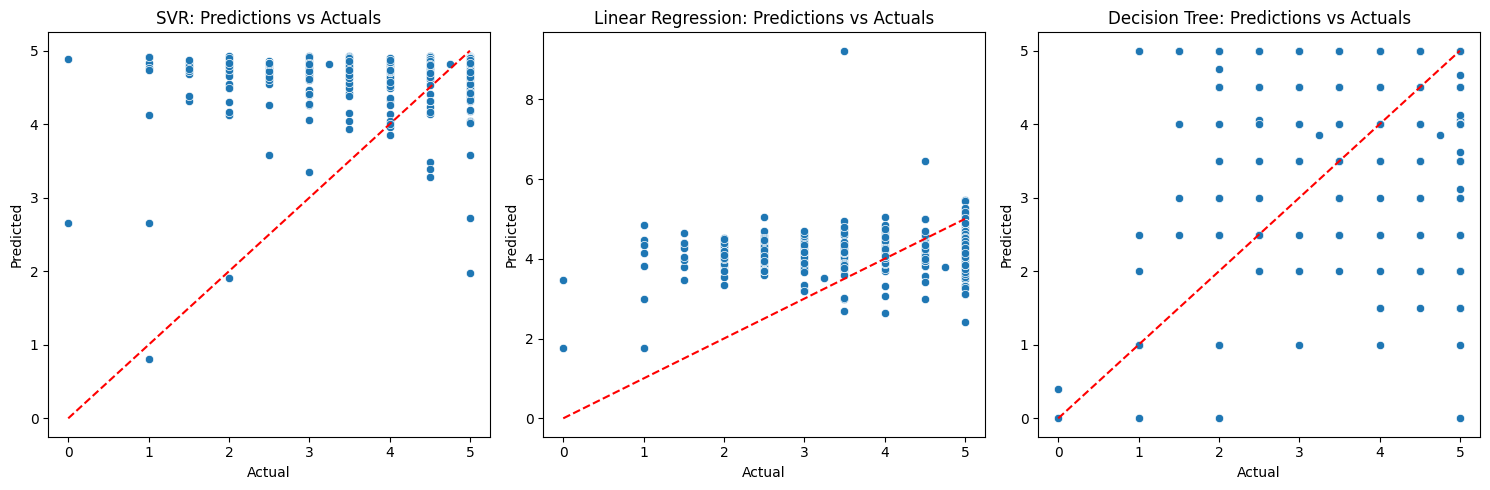

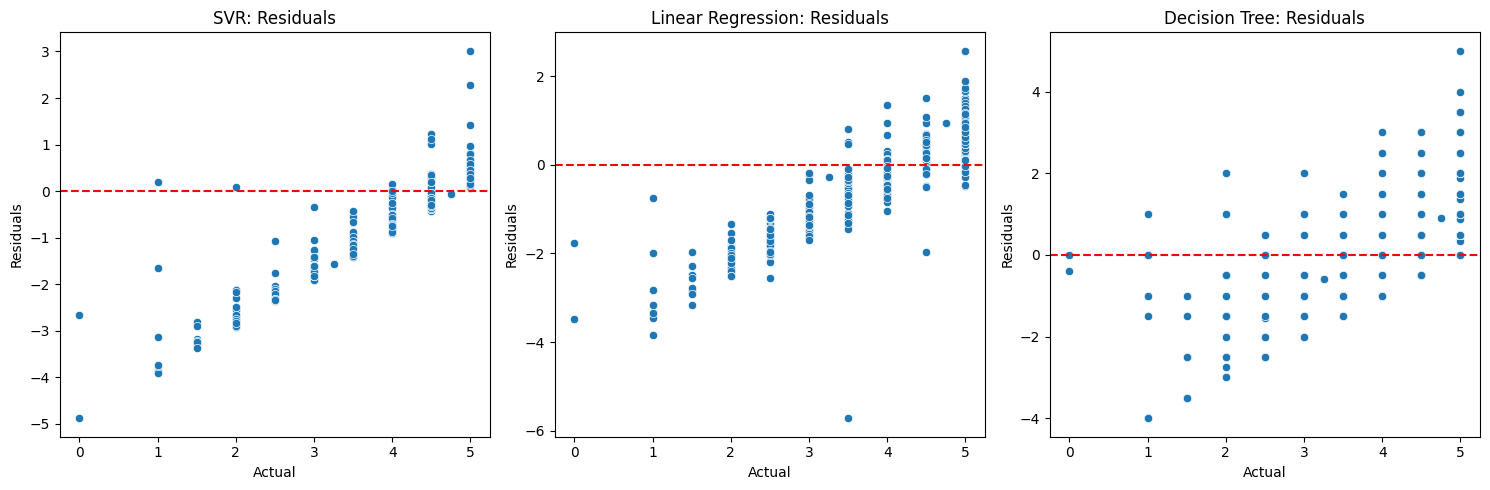

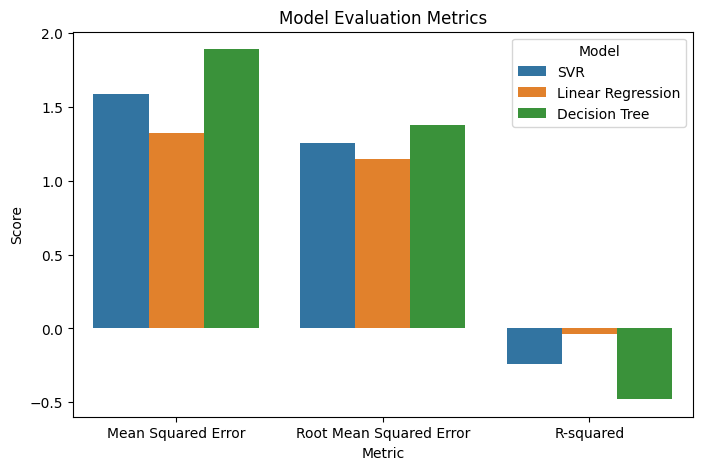

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 5))

# SVR predictions vs actual values
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_svr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Predictions vs Actuals')

# Linear Regression predictions vs actual values
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Predictions vs Actuals')

# Decision Tree predictions vs actual values
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Predictions vs Actuals')



plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))

# SVR residuals
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_test - y_pred_svr)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('SVR: Residuals')

# Linear Regression residuals
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_test - y_pred_lr)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals')

# Decision Tree residuals
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_test - y_pred_dt)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Decision Tree: Residuals')


plt.tight_layout()
plt.show()

# Bar plot for evaluation metrics
metrics = ['Mean Squared Error', 'Root Mean Squared Error', 'R-squared']
values = [mse_svr, rmse_svr, r2_svr, mse_lr, rmse_lr, r2_lr, mse_dt, rmse_dt, r2_dt]
index = ['SVR', 'SVR', 'SVR', 'Linear Regression', 'Linear Regression', 'Linear Regression', 'Decision Tree', 'Decision Tree', 'Decision Tree']

metrics_df = pd.DataFrame({'Metric': metrics * 3, 'Value': values, 'Model': index})

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_df)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.show()

# PART2 : **Language Modeling / Classification**

In [74]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

In [75]:
data = pd.read_csv(r'C:\Users\IMANE\Downloads\twitter_training.csv', sep=',', names=['ID', 'Entity', 'Sentiment', 'Text'])
val_data = pd.read_csv(r'C:\Users\IMANE\Downloads\twitter_validation.csv', sep=',', names=['ID', 'Entity', 'Sentiment', 'Text'])

In [76]:
print(data.head())

     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [77]:
print(val_data.head())

     ID     Entity   Sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                Text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  


In [78]:
data.dropna(subset=['Text'], inplace=True)
val_data.dropna(subset=['Text'], inplace=True)

In [79]:
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

def tokenize(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]


In [80]:
data['cleaned_text'] = data['Text'].apply(preprocess_text)
val_data['cleaned_text'] = val_data['Text'].apply(preprocess_text)

data['tokens'] = data['cleaned_text'].apply(tokenize)
val_data['tokens'] = val_data['cleaned_text'].apply(tokenize)

data['tokens'] = data['tokens'].apply(remove_stopwords)
val_data['tokens'] = val_data['tokens'].apply(remove_stopwords)

data['tokens'] = data['tokens'].apply(lemmatize)
val_data['tokens'] = val_data['tokens'].apply(lemmatize)

In [82]:
word2vec_model = Word2Vec(sentences=data['tokens'], vector_size=100, window=5, min_count=1, sg=0)

# Function to get word embeddings
def get_word_embedding(tokens, model):
    embeddings = []
    for word in tokens:
        if word in model.wv:
            embeddings.append(model.wv[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no embeddings found

# Apply word embeddings
train_word2vec = data['tokens'].apply(lambda x: get_word_embedding(x, word2vec_model))
val_word2vec = val_data['tokens'].apply(lambda x: get_word_embedding(x, word2vec_model))


In [83]:
# Bag of Words
bow_vectorizer = CountVectorizer()
train_bow = bow_vectorizer.fit_transform(data['cleaned_text'])
val_bow = bow_vectorizer.transform(val_data['cleaned_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
train_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_text'])
val_tfidf = tfidf_vectorizer.transform(val_data['cleaned_text'])

In [85]:
X_train = np.vstack(train_word2vec)
X_val = np.vstack(val_word2vec)

y_train = data['Sentiment'].values
y_val = val_data['Sentiment'].values

In [87]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_val)

In [88]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_val)

In [89]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)

C:\Users\IMANE\pythonlab\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_val)

In [94]:
# Evaluate models
svm_accuracy = accuracy_score(y_val, svm_pred)
svm_f1 = f1_score(y_val, svm_pred, average='weighted')

nb_accuracy = accuracy_score(y_val, nb_pred)
nb_f1 = f1_score(y_val, nb_pred, average='weighted')

lr_accuracy = accuracy_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred, average='weighted')

adb_accuracy = accuracy_score(y_val, ada_pred)
adb_f1 = f1_score(y_val, ada_pred, average='weighted')

# Print results
print("SVM - Accuracy:", svm_accuracy, "F1 Score:", svm_f1)
print("Naive Bayes - Accuracy:", nb_accuracy, "F1 Score:", nb_f1)
print("Logistic Regression - Accuracy:", lr_accuracy, "F1 Score:", lr_f1)
print("AdaBoost - Accuracy:", adb_accuracy, "F1 Score:", adb_f1)


SVM - Accuracy: 0.589 F1 Score: 0.571042148970057
Naive Bayes - Accuracy: 0.476 F1 Score: 0.47379327857108183
Logistic Regression - Accuracy: 0.532 F1 Score: 0.5052603419063398
AdaBoost - Accuracy: 0.521 F1 Score: 0.5026804283528512


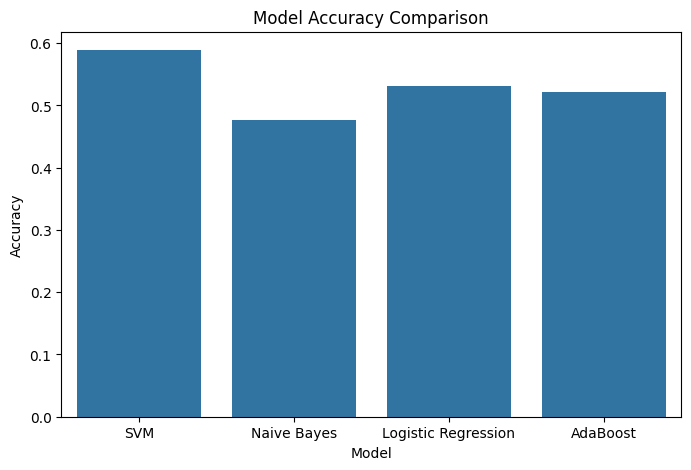

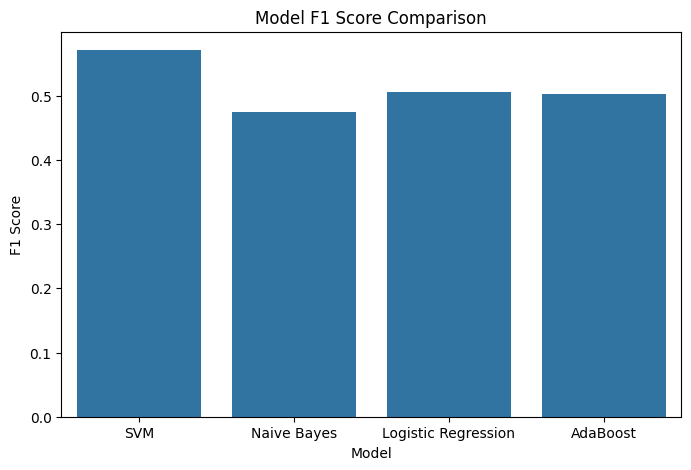

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot results
models = ['SVM', 'Naive Bayes', 'Logistic Regression', 'AdaBoost']
accuracy_scores = [svm_accuracy, nb_accuracy, lr_accuracy, adb_accuracy]
f1_scores = [svm_f1, nb_f1, lr_f1, adb_f1]

results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores
})


plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='F1 Score', data=results_df)
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.show()